# **ELG 7172B : **: Homework 9 Solutions

Solutions are provided by Zijian Long and Xiaoyan Li and modified by Miodrag Bolic

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas as pd
import pymc3 as pm
%matplotlib inline
#from scipy import stats

# Problem 1: 
Generate (x, y) points from the following function y = x*sin(x) where x can take values 0, 2, 4, 6, 8, 10, 12 and 14.

a)     Perform regression using Gaussian processes. Show the regression curve together with 95% confidence intervals. Try 2 kernels of your choice and explain results.

b)     Find the mean and the variance of the prediction $y_*$ for the following values of $x_*$: 1, 14.5 and 18.




# Answer:

Please note that the solution is provided using sklearn Gaussian process library.

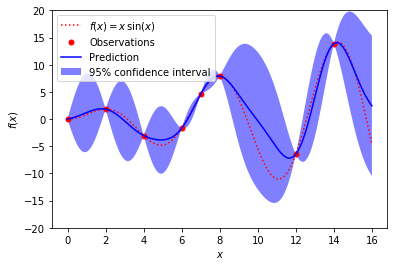

In [19]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern
np.random.seed(1)


def f(x):
    return x * np.sin(x)


X = np.atleast_2d([0., 2., 4., 6. ,7. ,8, 12, 14]).T
y = f(X).ravel()

x = np.atleast_2d(np.linspace(0, 16, 1000)).T

# Instanciate a Gaussian Process model
#kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),nu=1.5)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50)
gp.fit(X, y)

y_pred, sigma = gp.predict(x, return_std=True)

fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-20, 20)
plt.legend(loc='upper left')
plt.show()


In [20]:
# part b)
Xtest = np.array([1, 14.5, 18]).reshape(-1,1)
y_pred, sigma = gp.predict(Xtest, return_std=True)

y1_f=f(Xtest)
print('The mean of predictions: ',y_pred)
print('The value of the function is: ',y1_f)
print('The standard deviation of predictions: ',sigma)


The mean of predictions:  [  1.19099452e+00   1.31326987e+01   1.01262918e-02]
The value of the function is:  [[  0.84147098]
 [ 13.55597831]
 [-13.51777044]]
The standard deviation of predictions:  [ 3.68008673  2.96082964  6.67210671]


The mean and the standard deviation of the prediction $y_*$ for the following values of $x_*$: 1 is 1.19 and 3.68.

The mean and the standard deviation of the prediction $y_*$ for the following values of $x_*$: 14.5 is 13.13 and 2.9.

The mean and the standard deviation of the prediction $y_*$ for the following values of $x_*$: 18 is 0.01 and 6.67.

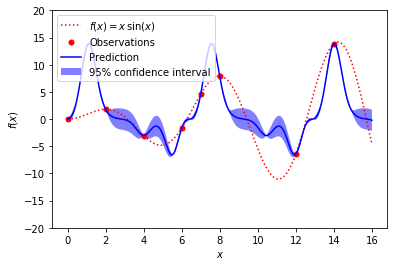

In [26]:
# a) Using different Kernel
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern, ExpSineSquared
np.random.seed(1)


def f(x):
    return x * np.sin(x)


X = np.atleast_2d([0., 2., 4., 6. ,7. ,12, 14, 8.]).T
y = f(X).ravel()

x = np.atleast_2d(np.linspace(0, 16, 1000)).T

# Instanciate a Gaussian Process model
#kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),nu=1.5)
kernel =ExpSineSquared(length_scale=0.2, periodicity=1.0,
                                length_scale_bounds=(0.01, 100.0),
                                periodicity_bounds=(0.1, 10.0))
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
gp.fit(X, y)

y_pred, sigma = gp.predict(x, return_std=True)

fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-20, 20)
plt.legend(loc='upper left')
plt.show()

# Problem 2:
Measurements of the number of units per package are done in 5 factories. All factories produce the same kind of units. We are interested in modeling this system and then answering some questions related to uncertainty.

a.      Perform preliminary data analysis by drawing the boxplot per location. Obtain mean and variance of units per location and total mean and variance.

b.      Define non-hieararchical model in which you would ignore the location information and chose appropriate values for priors. Implement it in PyMC3.

c.      Define hierarchical model and chose appropriate values for priors. Implement it in PYMC3. You can use Poisson distribution for the likelihood. Poisson distribution has parameter lambda- you can use Gamma distribution as a prior for it. Parameter lambda can have different values per location.

d.      Perform Gelman-Rubin and Autocorrelation check for both models

e.      Draw residuals for hierarchical model (both per location as well as for all locations – total 6 graphs) and see if they look uncorrelated and normal.

f.      Compute Waic for both hierarchical and non-hierarchical models and compare them.

g.      Perform posterior predictive simulation and then answer the following questions: What is the probability that the number of units per package in any location to be greater than 15? What is the probability that the next package produced in location 1 will be less than 7.

h.      Repeat previous question by bootstrapping all the data to answer the first part and bootstrapping data for location 1 to answer the second part. Compare the results and comment on them.

 
   

# Answer:

In [5]:
#x1=np.array([6, 7, 10, 10, 12],dtype=float)
#x2=np.array([8, 8, 11, 12, 13],dtype=float)
#x3=np.array([8, 9, 10, 11, 11],dtype=float)
#x4=np.array([6, 6, 12, 14, 14],dtype=float)
#x5=np.array([8, 12, 13, 15, 16],dtype=float)
#x=np.concatenate((x1,x2,x3,x4,x5))
#idx=np.array([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4])

n1=12
n2=12
n3=12
n4=12
n5=12
n=n1+n2+n3+n4+n5
np.random.seed(10)
x1=np.random.poisson(lam=10,size=n1)
x2=np.random.poisson(lam=11,size=n2)
x3=np.random.poisson(lam=9,size=n3)
x4=np.random.poisson(lam=10,size=n4)
x5=np.random.poisson(lam=12,size=n5)

x=np.concatenate((x1,x2,x3,x4,x5))
idx=np.concatenate(([0]*n1, [1]*n2, [2]*n3, [3]*n4, [4]*n5))

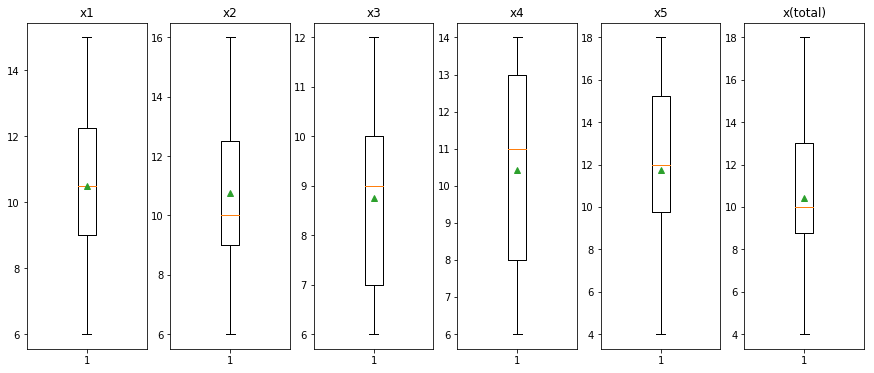

In [27]:
# Answer to (a)

fig, ax = plt.subplots(1,6, figsize=(15,6))
bp = ax[0].boxplot(x1, showmeans=True)
ax[0].set_title("x1")
bp = ax[1].boxplot(x2, showmeans=True)
ax[1].set_title("x2")
bp = ax[2].boxplot(x3, showmeans=True)
ax[2].set_title("x3")
bp = ax[3].boxplot(x4, showmeans=True)
ax[3].set_title("x4")
bp = ax[4].boxplot(x5, showmeans=True)
ax[4].set_title("x5")
bp = ax[5].boxplot(x, showmeans=True)
ax[5].set_title("x(total)")
plt.show()

In [28]:
print('For location x1, the mean is {}, and the variance is {}'.format(np.mean(x1),np.std(x1)))
print('For location x2, the mean is {}, and the variance is {}'.format(np.mean(x2),np.std(x2)))
print('For location x3, the mean is {}, and the variance is {}'.format(np.mean(x3),np.std(x3)))
print('For location x4, the mean is {}, and the variance is {}'.format(np.mean(x4),np.std(x4)))
print('For location x5, the mean is {}, and the variance is {}'.format(np.mean(x5),np.std(x5)))
print('Total mean is {}, and the variance is {}'.format(np.mean(x),np.std(x)))

For location x1, the mean is 10.5, and the variance is 2.4664414311581235
For location x2, the mean is 10.75, and the variance is 2.8613807855648994
For location x3, the mean is 8.75, and the variance is 1.689427911059441
For location x4, the mean is 10.416666666666666, and the variance is 2.628635049264584
For location x5, the mean is 11.75, and the variance is 4.205650960315181
Total mean is 10.433333333333334, and the variance is 3.046126866840724


In [29]:
# Answer to (b)

with pm.Model() as nhm:
    alpha=10
    beta=1
    lams=pm.Gamma('lams', alpha, beta, shape=5)
    likelihood=pm.Poisson('likelihood', mu=lams[idx], observed=x)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_nhm = pm.sample(5000, step, start)
    chain_nhm = trace_nhm[1000:]

logp = -162.61, ||grad|| = 27.586: 100%|██████████| 8/8 [00:00<00:00, 116.76it/s]
/usr/local/lib/python3.5/dist-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lams_log__]
100%|██████████| 5500/5500 [00:07<00:00, 733.44it/s]


In [30]:
pm.summary(chain_nhm)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
lams__0,10.467523,0.887048,0.009909,8.840101,12.280380,8000.0,0.999903
lams__1,10.680463,0.905271,0.007712,8.892187,12.432434,8000.0,0.999912
lams__2,8.857333,0.822309,0.007316,7.257785,10.469567,8000.0,1.000076
lams__3,10.379222,0.883005,0.007111,8.610196,12.143674,8000.0,0.999906
lams__4,11.608117,0.935502,0.008696,9.895787,13.485813,8000.0,0.999892


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1fba15438>,
      dtype=object)

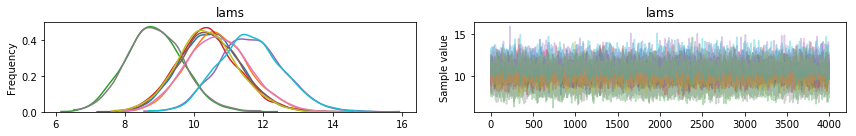

In [31]:
pm.traceplot(chain_nhm)

In [9]:
# Answer to (c)

with pm.Model() as hm:
    alpha=pm.Gamma('alpha', alpha=10, beta=1)
    beta=pm.Gamma('beta', alpha=10, beta=10)
    lams=pm.Gamma('lams', alpha, beta, shape=5)
    likelihood=pm.Poisson('likelihood', mu=lams[idx], observed=x)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_hm = pm.sample(5000, step, start)
    chain_hm = trace_hm[1000:]

logp = -161.49, ||grad|| = 0.012679: 100%|██████| 14/14 [00:00<00:00, 120.76it/s]
100%|████████████████████████████████████████| 5500/5500 [04:13<00:00, 21.72it/s]


In [12]:
pm.df_summary(chain_hm)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,11.100924,2.399953,0.039650,6.770741,16.156219
beta,1.055548,0.231112,0.003804,0.625337,1.520696
lams__0,10.490733,0.941030,0.011183,8.669094,12.358866
lams__1,10.721017,0.882286,0.011156,9.014427,12.476540
lams__2,8.897577,0.826700,0.009904,7.163670,10.428651
lams__3,10.433486,0.906346,0.009597,8.698484,12.197280
lams__4,11.650197,0.944084,0.012185,9.816125,13.511341


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd21cad1be0>,
      dtype=object)

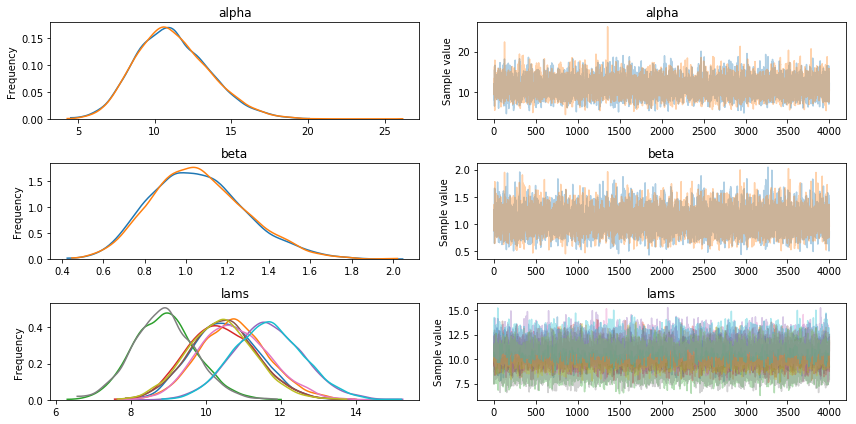

In [34]:
pm.traceplot(chain_hm)

In [41]:
# Answer to (d)

pm.gelman_rubin(chain_nhm)
pm.autocorrplot(chain_nhm)
pm.gelman_rubin(chain_hm)
pm.autocorrplot(chain_hm)

ValueError: Gelman-Rubin diagnostic requires multiple chains of the same length.

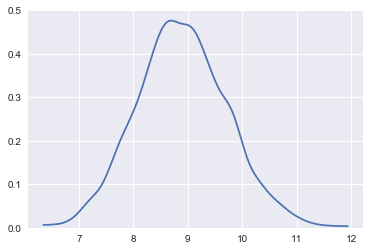

In [36]:
mu_at_x1=chain_hm['lams'][:,2]
pm.kdeplot(mu_at_x1)

Both models convergend very well.

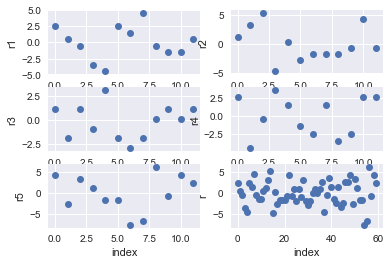

In [39]:
# Answer to (e)

r1=x1-chain_hm.get_values('lams')[:,0].mean()
r2=x2-chain_hm.get_values('lams')[:,1].mean()
r3=x3-chain_hm.get_values('lams')[:,2].mean()
r4=x4-chain_hm.get_values('lams')[:,3].mean()
r5=x5-chain_hm.get_values('lams')[:,4].mean()
r=np.concatenate((r1,r2,r3,r4,r5))
plt.figure()
plt.subplot(321)
plt.plot(r1, 'o')
plt.xlabel('index')
plt.ylabel('r1')
plt.subplot(322)
plt.plot(r2, 'o')
plt.xlabel('index')
plt.ylabel('r2')
plt.subplot(323)
plt.plot(r3, 'o')
plt.xlabel('index')
plt.ylabel('r3')
plt.subplot(324)
plt.plot(r4, 'o')
plt.xlabel('index')
plt.ylabel('r4')
plt.subplot(325)
plt.plot(r5, 'o')
plt.xlabel('index')
plt.ylabel('r5')
plt.subplot(326)
plt.plot(r, 'o')
plt.xlabel('index')
plt.ylabel('r')

(1) The residuals look uncorrelated. (2) Normality is not tested.

In [37]:
# Answer to (f)

pm.waic(trace=trace_nhm, model=nhm)

WAIC_r(WAIC=306.37895660374863, WAIC_se=9.14248684727033, p_WAIC=3.688278462961055)

In [38]:
pm.waic(trace=trace_hm, model=hm)

WAIC_r(WAIC=306.59992697537785, WAIC_se=9.158082253041016, p_WAIC=3.7927568139776233)

We can see that WAIC values of both models are similar. The hierarchical model has a slightly higher value.

In [48]:
# Answer to (g)

ppc_hm=pm.sample_ppc(trace_hm, samples=1000, model=hm)
generated=ppc_hm['likelihood'] # generated data from all locations
p15=np.sum(generated>15)/generated.size
print('the probability that the number of units per package in any location to be greater than 15: {}'.format(p15))
generated_loc1=generated[:,0:n1]
p7=np.sum(generated_loc1<7)/generated_loc1.size
print('the probability that the next package produced in location 1 will be less than 7: {}'.format(p7))

100%|██████████████████████████████████████| 1000/1000 [00:00<00:00, 2803.51it/s]


the probability that the number of units per package in any location to be greater than 15: 0.08051666666666667
the probability that the next package produced in location 1 will be less than 7: 0.10541666666666667


In [46]:
# Answer to (h)  
B_samples=5000;
p15_bootstrap=np.zeros(B_samples)
for i in range(B_samples):
    ind=np.random.randint(low=0, high=n, size=n)
    p15_bootstrap[i]=(x[ind]>15).sum()/ind.size
print('using bootstraping, the probability that the number of units per package in any location to be greater than 15: {}'.format(p15_bootstrap.mean()))
    
p7_bootstrap=np.zeros(B_samples)
for i in range(B_samples):
    ind=np.random.randint(low=0, high=n1, size=n1)
    p7_bootstrap[i]=(x1[ind]<7).sum()/ind.size
print('using bootstraping, the probability that the next package produced in location 1 will be less than 7: {}'.format(p7_bootstrap.mean()))

using bootstraping, the probability that the number of units per package in any location to be greater than 15: 0.06640333333333333
using bootstraping, the probability that the next package produced in location 1 will be less than 7: 0.08271666666666666


In [50]:
generated[:,0:n1].shape

(1000, 12)

We can see that performing posterior predictive simulation method, the probability of the number of units per package in any location and the probability of that in next package produced in location 1 are about 2% higer than using boostrapping.